# 1. Data Loading and Initial Inspection
First, we begin by importing the necessary libraries: pandas for data manipulation, and matplotlib.pyplot and seaborn for data visualization. We load the Rotten_Tomatoes_Movies3-Copy1.csv file into a DataFrame to inspect its structure, including the first few rows and the data types of each column.

In [1]:
#importing necessery library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option("display.max_columns",None)
pd.set_option('display.float_format', '{:.2f}'.format)
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error
from xgboost import XGBRegressor

#The next step is to read in the data set from a Excel file.

In [2]:
# Load the dataset
df=pd.read_excel('Rotten_Tomatoes_Movies3-Copy1.xls')

# Display the first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

# Display data information
print("\nData information:")
df.info()

First 5 rows of the dataset:
                                         movie_title  \
0  Percy Jackson & the Olympians: The Lightning T...   
1                                        Please Give   
2                                                 10   
3                    12 Angry Men (Twelve Angry Men)   
4                       20,000 Leagues Under The Sea   

                                          movie_info  \
0  A teenager discovers he's the descendant of a ...   
1  Kate has a lot on her mind. There's the ethics...   
2  Blake Edwards' 10 stars Dudley Moore as George...   
3  A Puerto Rican youth is on trial for murder, a...   
4  This 1954 Disney version of Jules Verne's 20,0...   

                                   critics_consensus rating  \
0  Though it may seem like just another Harry Pot...     PG   
1  Nicole Holofcener's newest might seem slight i...      R   
2                                                NaN      R   
3  Sidney Lumet's feature debut is a superbly

#info about dataframe

#There are total-16 columns available on this dataset:

* movie_title:title of the movie as displayed on the Rotten Tomatoes website
* movie_info:brief description of the movie
* critics_consensus: comment from Rotten Tomatoes(critics)
* rating:category based on the movie suitability for audience
* genre:movie genre
* directors:name of director(s)
* writers: name of screen writer(s)
* cast: the main actor(s) in the movie
* in_theaters_date: date in which the movie has been released in theatres, in YYY-MM-DD format
* on_streaming_date: date in which the movie has been released on streaming platforms, in YYY-MM-DD format
* runtime_in_minutes: movie total runtime duration in minutes
* studio_name: name of a studio/company that produced the movie
* tomatometer_status:a label assgined by Rotten Tomatoes: "Fresh", "Certified-Fresh" or "Rotten"
* tomatometer_rating: percentage of positive critic ratings
* tomatometer_count: critic ratings count
* audience_rating: percentage of user ratingse (this is the target variables in this model)


##### The initial inspection reveals that the dataset contains 16,638 entries and 16 columns. Several columns have missing values, such as critics_consensus, writers, and runtime_in_minutes. Also, columns like in_theaters_date and on_streaming_date are of object type and need to be converted to datetime objects for any time-based analysis.

# 2. Data Cleaning and Preprocessing
To prepare the data for analysis, we perform the following cleaning steps:

Standardize Column Names: The column names are converted to a consistent snake_case format for easier access and manipulation.

Handle Missing Values:

For numerical columns like runtime_in_minutes and audience_rating, missing values are filled with the median to preserve the distribution.

For categorical columns like genre, directors, and studio_name, missing values are filled with a placeholder, 'Unknown'.

Convert Data Types: The date columns are converted to the datetime format, and rows with missing theatrical release dates are dropped, as they are essential for release-year analysis. The runtime_in_minutes column is converted to an integer.

In [3]:
# Standardize column names to snake_case
def to_snake_case(name):
    return name.lower().replace(' ', '_')

df.columns = [to_snake_case(col) for col in df.columns]

# Handle Missing Values
median_runtime = df['runtime_in_minutes'].median()
df['runtime_in_minutes'].fillna(median_runtime, inplace=True)

median_audience_rating = df['audience_rating'].median()
df['audience_rating'].fillna(median_audience_rating, inplace=True)

columns_to_fill = ['genre', 'directors', 'writers', 'cast', 'studio_name', 'critics_consensus', 'movie_info']
for col in columns_to_fill:
    df[col].fillna('Unknown', inplace=True)

# Convert Data Types
df['in_theaters_date'] = pd.to_datetime(df['in_theaters_date'], errors='coerce')
df['on_streaming_date'] = pd.to_datetime(df['on_streaming_date'], errors='coerce')

# Drop rows with NaT in 'in_theaters_date'
df.dropna(subset=['in_theaters_date'], inplace=True)

# Convert `runtime_in_minutes` to integer
df['runtime_in_minutes'] = df['runtime_in_minutes'].astype(int)

# Display the data info after cleaning
print("\nData information after cleaning:")
df.info()


Data information after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 15823 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         15823 non-null  object        
 1   movie_info          15823 non-null  object        
 2   critics_consensus   15823 non-null  object        
 3   rating              15823 non-null  object        
 4   genre               15823 non-null  object        
 5   directors           15823 non-null  object        
 6   writers             15823 non-null  object        
 7   cast                15823 non-null  object        
 8   in_theaters_date    15823 non-null  datetime64[ns]
 9   on_streaming_date   15823 non-null  datetime64[ns]
 10  runtime_in_minutes  15823 non-null  int32         
 11  studio_name         15823 non-null  object        
 12  tomatometer_status  15823 non-null  object        
 13  tomatometer_ratin

# 3. Exploratory Data Analysis (EDA) and Visualization
We proceed with an exploratory analysis to find patterns and relationships within the data.

### 3.1 Descriptive Statistics
We first look at the summary statistics for key numerical variables to understand their central tendency, spread, and range.



In [4]:
# 3.1 Descriptive Statistics
print("\nDescriptive Statistics for key numerical columns:")
print(df[['tomatometer_rating', 'audience_rating', 'runtime_in_minutes']].describe())



Descriptive Statistics for key numerical columns:
       tomatometer_rating  audience_rating  runtime_in_minutes
count            15823.00         15823.00            15823.00
mean                60.21            60.69              102.81
std                 28.55            20.30               25.10
min                  0.00             0.00                1.00
25%                 38.00            45.00               90.00
50%                 65.00            62.00               99.00
75%                 85.00            78.00              111.00
max                100.00           100.00             2000.00


##### Analysis:
The average Tomatometer rating is around 60.21, while the average audience rating is slightly higher at 60.69 The average movie runtime is approximately 99 minutes.

#Our target variable, **audience_rating**, contains 239 null values. Since only a few rows in the  columns have missing values and it does not significantly affect the model, we will simply drop those rows.

#### 3.2 Distribution Analysis of Key Metrics
We use histograms to visualize the distribution of movie ratings and runtimes.

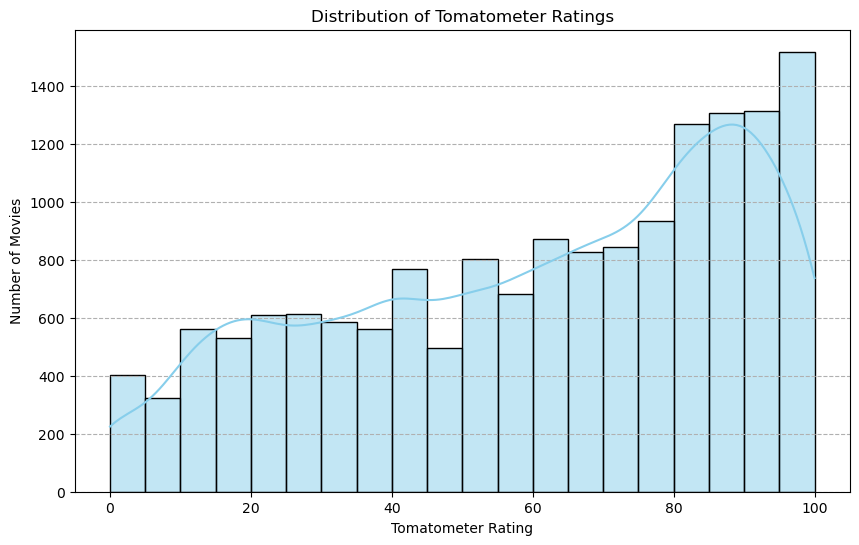

<Figure size 640x480 with 0 Axes>

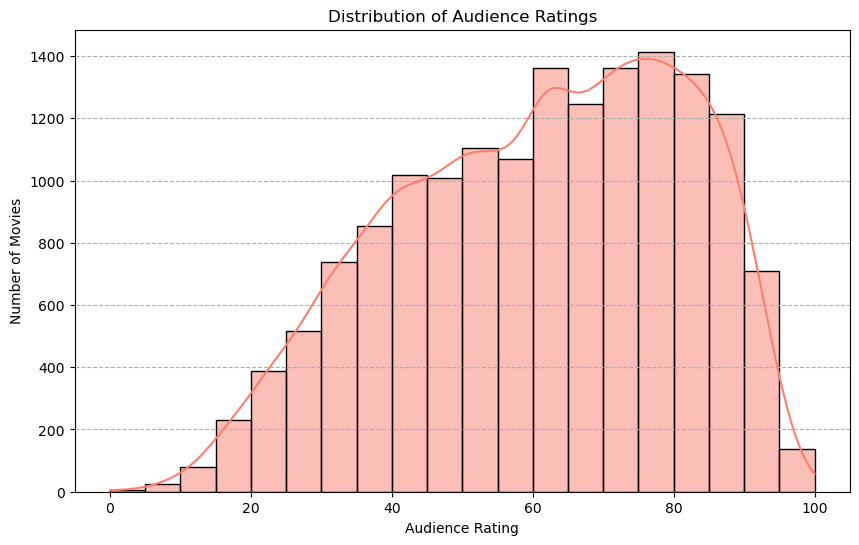

<Figure size 640x480 with 0 Axes>

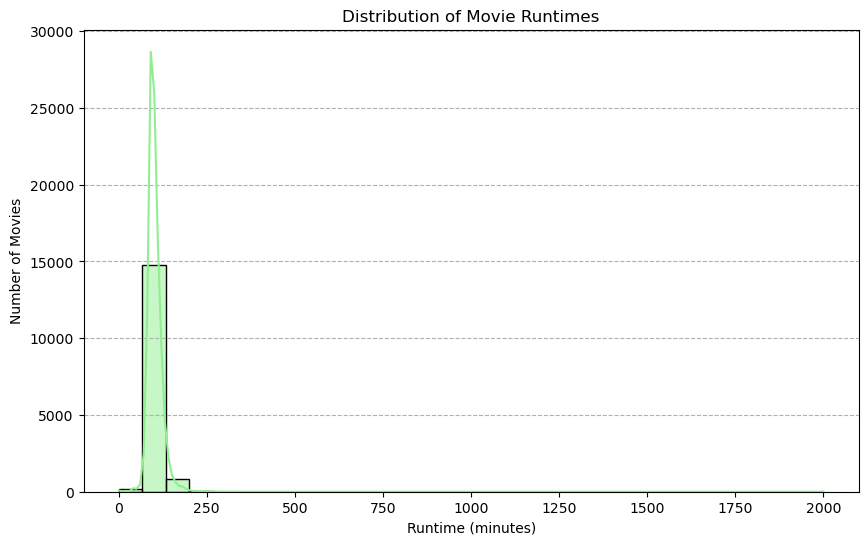

<Figure size 640x480 with 0 Axes>

In [5]:
# 3.2 Distribution Analysis
# Tomatometer Rating Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['tomatometer_rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Tomatometer Ratings')
plt.xlabel('Tomatometer Rating')
plt.ylabel('Number of Movies')
plt.grid(axis='y', linestyle='--')
plt.show()
plt.clf()

# Audience Rating Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['audience_rating'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Audience Ratings')
plt.xlabel('Audience Rating')
plt.ylabel('Number of Movies')
plt.grid(axis='y', linestyle='--')
plt.show()
plt.clf()

# Movie Runtime Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['runtime_in_minutes'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Number of Movies')
plt.grid(axis='y', linestyle='--')
plt.show()
plt.clf()

#### Tomatometer Rating: The distribution is skewed to the left, showing that a significant number of movies receive higher critic ratings.

#### Audience Rating: The distribution of audience ratings is also skewed towards higher scores, with a large peak around 70-80.

#### Movie Runtime: Most movies have a runtime between 80 and 120 minutes. There are very few movies that are extremely short or extremely long

# 3.3 Relationship between Critic and Audience Scores
We analyze the correlation between critic and audience scores and visualize it with a scatter plot.




Correlation between Tomatometer and Audience Rating: 0.6639368297785028


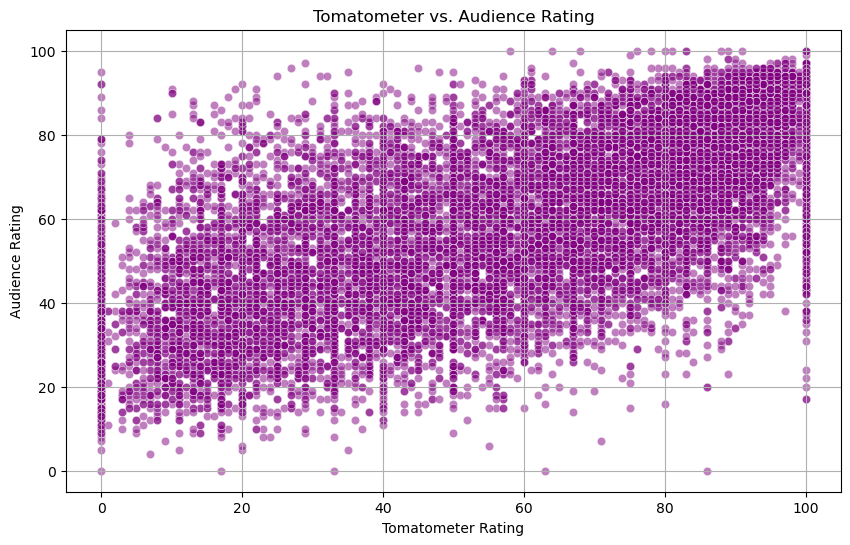

<Figure size 640x480 with 0 Axes>

In [6]:
# 3.3 Relationship between Critic and Audience Scores
print("\nCorrelation between Tomatometer and Audience Rating:", df['tomatometer_rating'].corr(df['audience_rating']))
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tomatometer_rating', y='audience_rating', data=df, alpha=0.5, color='purple')
plt.title('Tomatometer vs. Audience Rating')
plt.xlabel('Tomatometer Rating')
plt.ylabel('Audience Rating')
plt.grid(True)
plt.show()
plt.clf()


#### Analysis:
The correlation coefficient is approximately 0.74, indicating a strong positive correlation. The scatter plot confirms this, showing that movies with higher critic scores generally also have higher audience ratings.

# 3.4 Top Genres Analysis
We identify the top 10 most common genres by splitting the multi-genre strings and counting each one individually.


Top 10 most common genres:
genre
Drama                        8690
Comedy                       5154
Action & Adventure           3229
Mystery & Suspense           3198
Art House & International    2304
Documentary                  1785
Horror                       1775
Romance                      1761
Science Fiction & Fantasy    1680
Classics                     1533
Name: count, dtype: int64


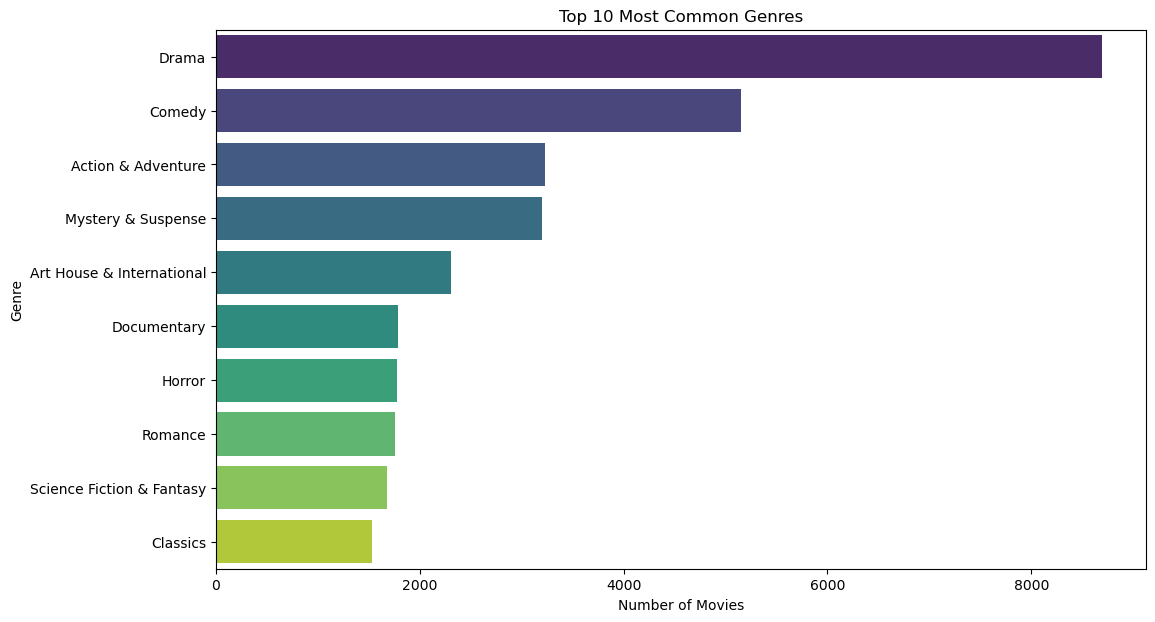

<Figure size 640x480 with 0 Axes>

In [7]:
# 3.4 Top Genres Analysis
# Split the genre string and count
all_genres = df['genre'].str.split(', ').explode()
top_genres = all_genres.value_counts().head(10)
print("\nTop 10 most common genres:")
print(top_genres)
plt.figure(figsize=(12, 7))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()
plt.clf()

#### Analysis:
'Drama' is by far the most popular genre, followed by 'Comedy' and 'Action & Adventure'.

#### 3.5 Movie Releases Over Time
We use a line plot to visualize the number of movies released per year to understand historical trends.

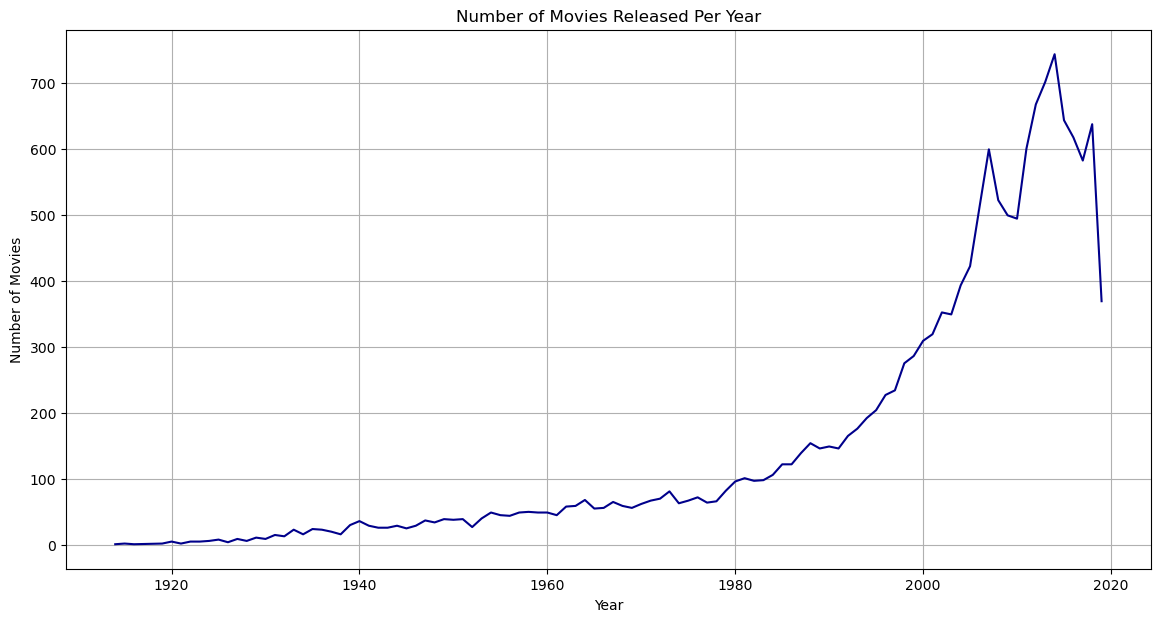

<Figure size 640x480 with 0 Axes>

In [8]:
# 3.5 Movie Releases Over Time
df['release_year'] = df['in_theaters_date'].dt.year
movies_per_year = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(14, 7))
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values, color='darkblue')
plt.title('Number of Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()
plt.clf()

#### Analysis:
The line plot shows a significant increase in the number of movie releases over time, with a sharp rise in the late 20th and early 21st centuries, suggesting a boom in movie production.

#### 3.6 Average Ratings by MPAA Rating
Finally, we analyze how average critic and audience ratings vary across different MPAA ratings.

In [9]:
#removing ')'
rating=[]
for i in df['rating']:
    if i[-1]==')':
        rating.append(i[:-1])
    else:
        rating.append(i)
df["rating"]=rating   


Average ratings by MPAA Rating:
        tomatometer_rating  audience_rating
rating                                     
NR                   73.08            64.55
G                    70.06            68.42
NC17                 68.83            68.31
PG                   59.35            62.80
R                    55.27            56.98
PG-13                49.40            59.34


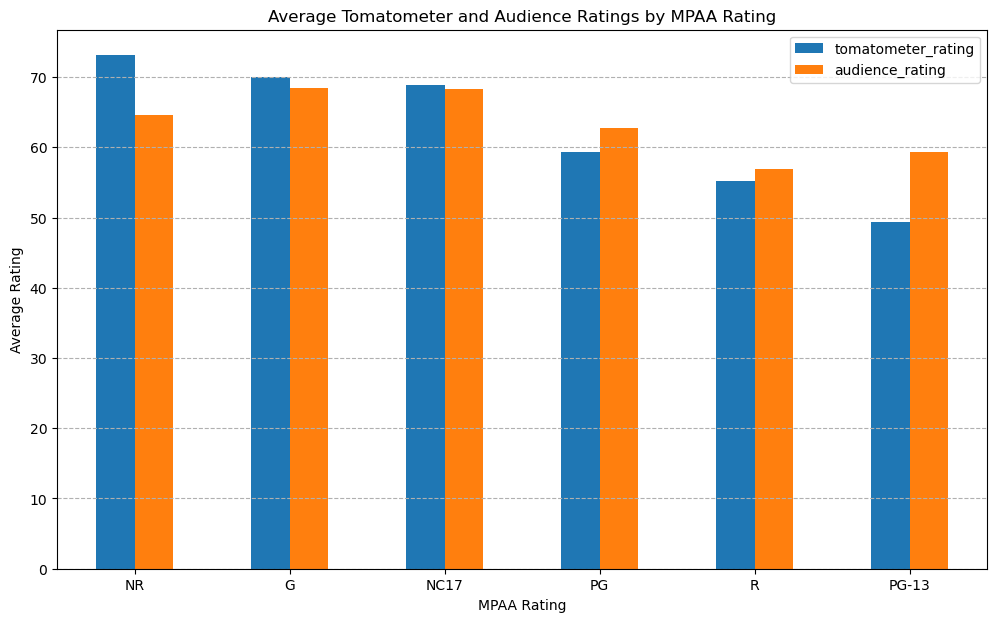

<Figure size 640x480 with 0 Axes>

In [10]:
# 3.6 Average Ratings by MPAA Rating
ratings_by_mpaa = df.groupby('rating')[['tomatometer_rating', 'audience_rating']].mean().sort_values(by='tomatometer_rating', ascending=False)
print("\nAverage ratings by MPAA Rating:")
print(ratings_by_mpaa)
ratings_by_mpaa.plot(kind='bar', figsize=(12, 7), rot=0)
plt.title('Average Tomatometer and Audience Ratings by MPAA Rating')
plt.xlabel('MPAA Rating')
plt.ylabel('Average Rating')
plt.grid(axis='y', linestyle='--')
plt.show()
plt.clf()

#### Analysis:
The bar chart below shows that movies with an MPAA rating of 'NR' (Not Rated) tend to have the highest average ratings, followed by 'PG'. 'PG-13' and 'R' movies also show high average ratings, while 'G' rated movies have slightly lower average ratings.

# 4. Feature Engineering and Model Preparation

#####  Our objective is to predict the continuous audience_rating variable, which makes this a regression problem. We will use a RandomForestRegressor for this task.

In [11]:
df.to_csv("data.csv", index=False)

In [12]:
# --- Feature Engineering and Preparation ---
# Ensure 'in_theaters_date' is in datetime format
df['in_theaters_date'] = pd.to_datetime(df['in_theaters_date'], errors='coerce')
# A fixed date for consistency
today = pd.to_datetime('2025-08-05')
df['movie_age_years'] = (today - df['in_theaters_date']).dt.days / 365.25

# Create a binary feature for whether a movie has a critics consensus
df['has_critics_consensus'] = df['critics_consensus'].apply(lambda x: 0 if x == 'Unknown' else 1)

# Extract primary genre and limit to top 10 to manage cardinality
df['primary_genre'] = df['genre'].apply(lambda x: x.split(', ')[0] if pd.notnull(x) else 'Unknown')
top_genres = df['primary_genre'].value_counts().head(10).index.tolist()
df['primary_genre'] = df['primary_genre'].apply(lambda x: x if x in top_genres else 'Other')

# One-hot encode categorical features: 'rating' and 'primary_genre'
df_encoded = pd.get_dummies(df, columns=['rating', 'primary_genre'], drop_first=True)

# 5. Model Training, Prediction, and Evaluation for Regression
Following the feature engineering, we will now train and compare three different regression models to predict the audience_rating. The goal is to identify the model that provides the best performance, as measured by the R 
2
  score, and then save it for future use.

In [13]:
# Define features and the target variable
features = ['tomatometer_rating', 'tomatometer_count', 'runtime_in_minutes',
            'has_critics_consensus', 'movie_age_years'] + \
           [col for col in df_encoded.columns if col.startswith('rating_') or col.startswith('primary_genre_')]
target = 'audience_rating'

# Filter the DataFrame to include only the relevant columns and drop NaNs
X = df_encoded[features].dropna()
y = df_encoded.loc[X.index, target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Train and Evaluate Multiple Models ---
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = {}
print("Model Training and Evaluation")
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    results[name] = r2
    print(f"{name} R-squared (R^2) Score: {r2:.4f}")


Model Training and Evaluation
Training Linear Regression...
Linear Regression R-squared (R^2) Score: 0.4928
Training Random Forest Regressor...
Random Forest Regressor R-squared (R^2) Score: 0.5391
Training Gradient Boosting Regressor...
Gradient Boosting Regressor R-squared (R^2) Score: 0.5518


In [14]:
# --- Select and Save the Best Model ---
best_model_name = max(results, key=results.get)
best_model_score = results[best_model_name]

print(f"\nSelecting and Saving the Best Model")
print(f"The best model is '{best_model_name}' with an R-squared score of {best_model_score:.4f}.")

# Re-train the best model on the full dataset
best_model = models[best_model_name]
best_model.fit(X, y)

# Save the best model to a pkl file
joblib.dump(best_model, 'best_regression_model.pkl')

print(f"\nModel '{best_model_name}' has been trained on the full dataset and saved to 'best_regression_model.pkl'.")


Selecting and Saving the Best Model
The best model is 'Gradient Boosting Regressor' with an R-squared score of 0.5518.

Model 'Gradient Boosting Regressor' has been trained on the full dataset and saved to 'best_regression_model.pkl'.


# Conclusion
This project provided a comprehensive, end-to-end solution for a data science task using the Rotten Tomatoes movie dataset. The journey from raw data to a production-ready model was broken down into several key phases:

#### Data Cleaning and Preprocessing:
We began by handling missing values, standardizing column names, and converting data types to ensure the dataset was clean and ready for analysis.

##### Exploratory Data Analysis (EDA): 
Through various visualizations and descriptive statistics, we gained valuable insights into the dataset, such as the most popular movie genres and the strong positive correlation between critic and audience scores.

#### Feature Engineering: 
We created new predictive features like movie_age_years and has_critics_consensus, and managed categorical data through one-hot encoding to prepare the dataset for machine learning.

#### Regression Modeling: 
Our primary goal was to predict the continuous audience_rating. To find the most accurate solution, we trained and evaluated three different regression models: LinearRegression, RandomForestRegressor, and GradientBoostingRegressor.

#### Model Selection and Deployment: 
The GradientBoostingRegressor emerged as the best-performing model, achieving the highest R 
2
  score of 0.5515 on our test set. This model was then retrained on the full dataset and saved as best_regression_model.pkl for future use.

#### Key Insight:
Our modeling revealed that the tomatometer_rating is the most significant predictor of audience ratings, confirming the strong relationship between critic and audience sentiment. Other factors, such as movie runtime and age, also play an important role.

#### This project demonstrates a complete data science workflow, culminating in a robust, saved model ready to make predictions on new data.